In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/covid19-confirmed-cases-kerala/Confirmed Covid 19 Cases Kerala.csv')
data

,Date,Confirmed
0,2020-01-31,0.0
1,2020-02-01,0.0
2,2020-02-02,1.0
3,2020-02-03,1.0
4,2020-02-04,0.0
...,...,...
478,2021-05-23,25820.0
479,2021-05-24,17821.0
480,2021-05-25,29803.0
481,2021-05-26,28798.0


In [3]:
data.shape

(483, 2)

In [4]:
data.isna().sum()

Date         0
Confirmed    0
dtype: int64

In [5]:
data.describe()

,Confirmed
count,483.000000
mean,5069.467909
std,8429.333602
min,0.000000
25%,62.000000
50%,2456.000000
75%,5771.500000
max,43529.000000


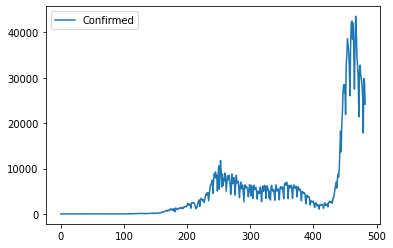

In [6]:
data.plot()
plt.show()

In [7]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)
data = data.set_index('Date')
data

,Confirmed
Date,
2020-01-31 00:00:00+00:00,0.0
2020-02-01 00:00:00+00:00,0.0
2020-02-02 00:00:00+00:00,1.0
2020-02-03 00:00:00+00:00,1.0
2020-02-04 00:00:00+00:00,0.0
...,...
2021-05-23 00:00:00+00:00,25820.0
2021-05-24 00:00:00+00:00,17821.0
2021-05-25 00:00:00+00:00,29803.0


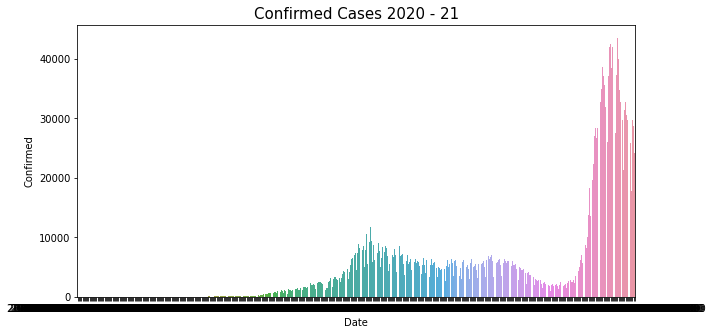

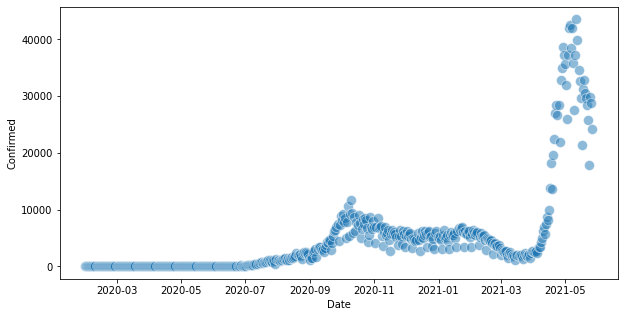

In [8]:
plt.figure(figsize=(10,5))
plt.title('Confirmed Cases 2020 - 21', fontsize=15)
sns.barplot(data.index, data.Confirmed)
plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(data.index, data.Confirmed, 
                s=100, alpha=0.5)
plt.show()

# Year-wise Analysis

In [9]:
data.index.year.unique()

Int64Index([2020, 2021], dtype='int64', name='Date')

In [10]:
data20 = data[data.index.year == 2020]
data21 = data[data.index.year == 2021]
print(data20.head())
print(data21.head())

                           Confirmed
Date                                
2020-01-31 00:00:00+00:00        0.0
2020-02-01 00:00:00+00:00        0.0
2020-02-02 00:00:00+00:00        1.0
2020-02-03 00:00:00+00:00        1.0
2020-02-04 00:00:00+00:00        0.0
                           Confirmed
Date                                
2021-01-01 00:00:00+00:00     4991.0
2021-01-02 00:00:00+00:00     5328.0
2021-01-03 00:00:00+00:00     4600.0
2021-01-04 00:00:00+00:00     3021.0
2021-01-05 00:00:00+00:00     5615.0


In [11]:
print('Covid19 Confirmed Cases')
print(f'2020: {int(data20.Confirmed.sum())}')
print(f'2021: {int(data21.Confirmed.sum())}')

Covid19 Confirmed Cases
2020: 760932
2021: 1687621


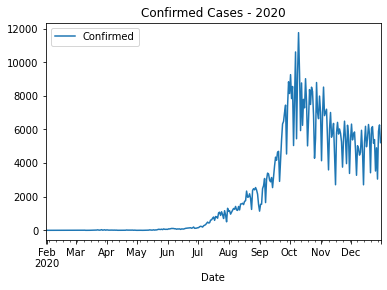

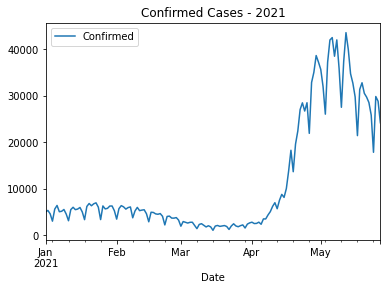

In [12]:
data20.plot()
plt.title('Confirmed Cases - 2020')
plt.show()
data21.plot()
plt.title('Confirmed Cases - 2021')
plt.show()

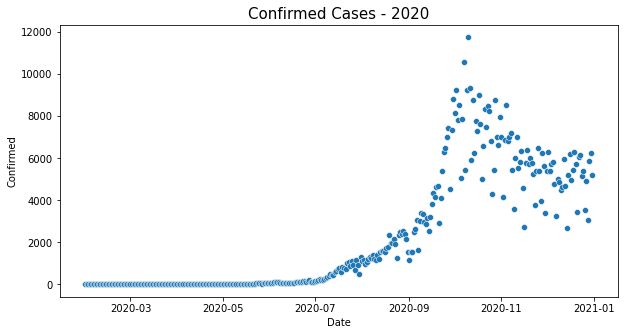

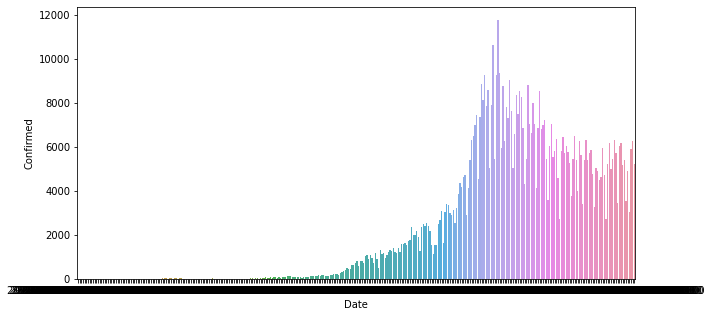

In [13]:
plt.figure(figsize=(10,5))
plt.title('Confirmed Cases - 2020', fontsize=15)
sns.scatterplot(data20.index, data20.Confirmed)
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(data20.index, data20.Confirmed)
plt.show()

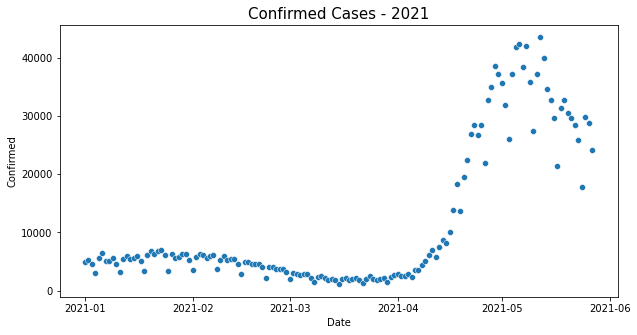

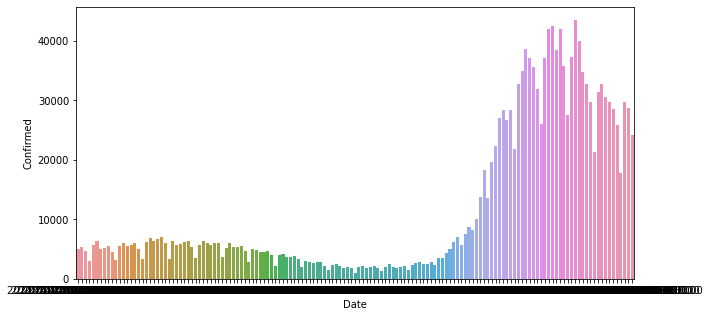

In [14]:
plt.figure(figsize=(10,5))
plt.title('Confirmed Cases - 2021', fontsize=15)
sns.scatterplot(data21.index, data21.Confirmed)
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(data21.index, data21.Confirmed)
plt.show()

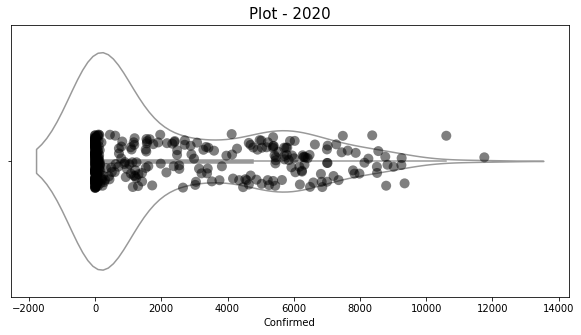

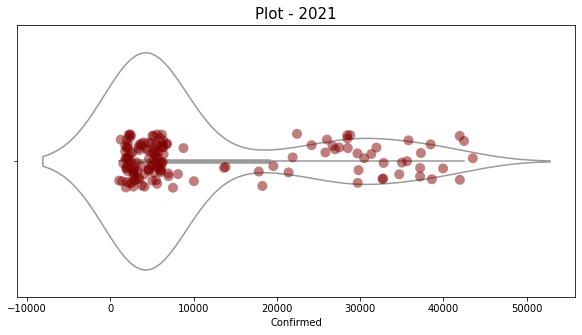

In [15]:
# Violinplot vs Stripplot
plt.figure(figsize=(10,5))
plt.title('Plot - 2020', fontsize=15)
sns.violinplot(data20.Confirmed, color='white')
sns.stripplot(data20.Confirmed, color='black', 
              s=10, alpha=0.5)
plt.show()
plt.figure(figsize=(10,5))
plt.title('Plot - 2021', fontsize=15)
sns.violinplot(data21.Confirmed, color='white')
sns.stripplot(data21.Confirmed, color='maroon', 
              s=10, alpha=0.5)
plt.show()

## Month-wise Analysis

In [16]:
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month = pd.DataFrame({'Month': index,
          'Y2020': data20.resample('M').sum().reset_index().Confirmed,
          'Y2021': data21.resample('M').sum().reset_index().Confirmed}).set_index('Month')
month

,Y2020,Y2021
Month,,
Jan,0.0,168245.0
Feb,2.0,130225.0
Mar,238.0,65181.0
Apr,256.0,446599.0
May,772.0,877371.0
Jun,3173.0,NaN
Jul,19171.0,NaN
Aug,51772.0,NaN
Sep,120721.0,NaN


In [17]:
month.describe()

,Y2020,Y2021
count,12.000000,5.000000
mean,63411.000000,337524.200000
std,84936.336395,335086.221712
min,0.000000,65181.000000
25%,251.500000,130225.000000
50%,11172.000000,168245.000000
75%,130028.500000,446599.000000
max,236999.000000,877371.000000


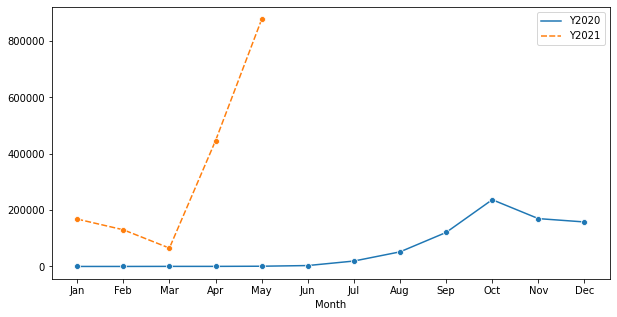

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=month, marker='o')
plt.show()

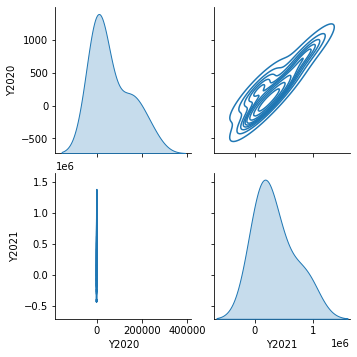

In [19]:
sns.pairplot(month, kind='kde')
plt.show()

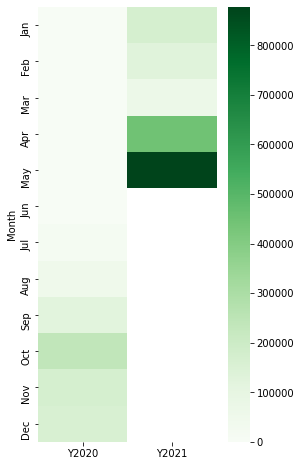

In [20]:
plt.figure(figsize=(4,8))
sns.heatmap(month, cmap='Greens')
plt.show()

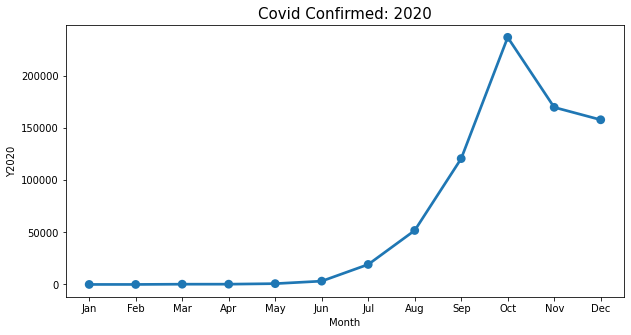

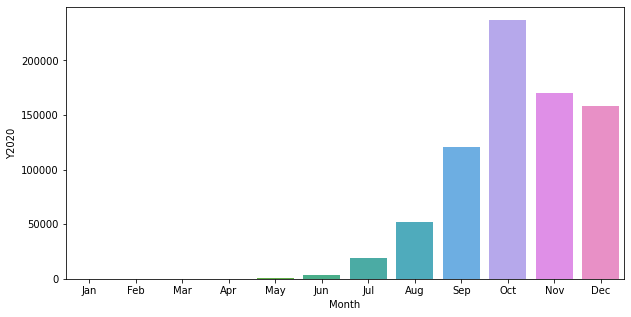

In [21]:
plt.figure(figsize=(10,5))
plt.title('Covid Confirmed: 2020', fontsize=15)
sns.pointplot(month.index, month.Y2020)
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(month.index, month.Y2020)
plt.show()

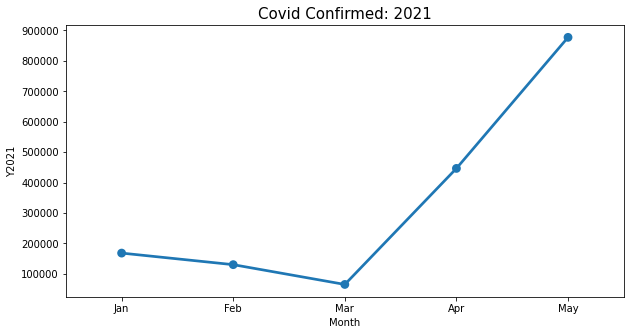

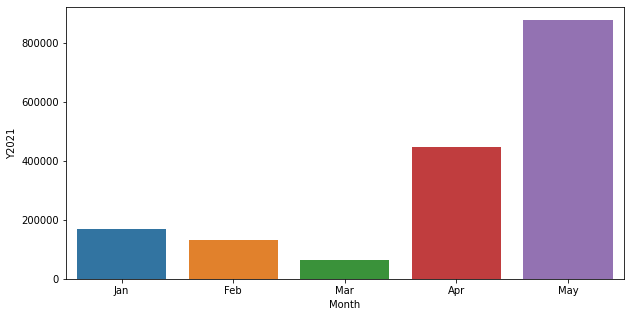

In [22]:
plt.figure(figsize=(10,5))
plt.title('Covid Confirmed: 2021', fontsize=15)
sns.pointplot(month.index[:5], month.Y2021[:5])
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(month.index[:5], month.Y2021[:5])
plt.show()

## Covid Cases: June 2020 - May 2021

In [23]:
data = data.loc['2020-06-01 00:00:00+00:00':]
data

,Confirmed
Date,
2020-06-01 00:00:00+00:00,57.0
2020-06-02 00:00:00+00:00,86.0
2020-06-03 00:00:00+00:00,82.0
2020-06-04 00:00:00+00:00,94.0
2020-06-05 00:00:00+00:00,111.0
...,...
2021-05-23 00:00:00+00:00,25820.0
2021-05-24 00:00:00+00:00,17821.0
2021-05-25 00:00:00+00:00,29803.0


In [24]:
col = ['Day',"Jun'20", "Jul'20", "Aug'20", "Sep'20", "Oct'20", "Nov'20",
       "Dec'20", "Jan'21", "Feb'21", "Mar'21", "Apr'21", "May'21"]
day = [x for x in range(1,32)]  
year_data = pd.DataFrame(columns=col)
year_data['Day'] = day
for i in range(6,13):
    year_data[col[i-5]] = data[data.index.month==i].reset_index().Confirmed 
for i in range(1,6):
    year_data[col[i+7]] = data[data.index.month==i].reset_index().Confirmed 
year_data = year_data.set_index('Day')
year_data

,Jun'20,Jul'20,Aug'20,Sep'20,Oct'20,Nov'20,Dec'20,Jan'21,Feb'21,Mar'21,Apr'21,May'21
Day,,,,,,,,,,,,
1,57.0,151.0,1129.0,1140.0,8135.0,7025.0,5375.0,4991.0,3459.0,1938.0,2798.0,35636.0
2,86.0,160.0,1169.0,1547.0,9258.0,4138.0,6316.0,5328.0,5716.0,2938.0,2508.0,31959.0
3,82.0,211.0,962.0,1553.0,7834.0,6862.0,5376.0,4600.0,6356.0,2765.0,2541.0,26011.0
4,94.0,240.0,1083.0,2479.0,8553.0,8516.0,5718.0,3021.0,6102.0,2616.0,2802.0,37190.0
5,111.0,225.0,1195.0,2655.0,5042.0,6820.0,5848.0,5615.0,5610.0,2776.0,2357.0,41953.0
6,108.0,193.0,1298.0,3082.0,7871.0,7002.0,4777.0,6394.0,5942.0,2791.0,3502.0,42464.0
7,107.0,272.0,1251.0,1648.0,10606.0,7201.0,3272.0,5051.0,6075.0,2100.0,3502.0,38460.0
8,91.0,301.0,1420.0,3026.0,5445.0,5440.0,5032.0,5142.0,3742.0,1412.0,4353.0,41971.0
9,91.0,339.0,1211.0,3402.0,9250.0,3593.0,4875.0,5528.0,5214.0,2316.0,5063.0,35801.0


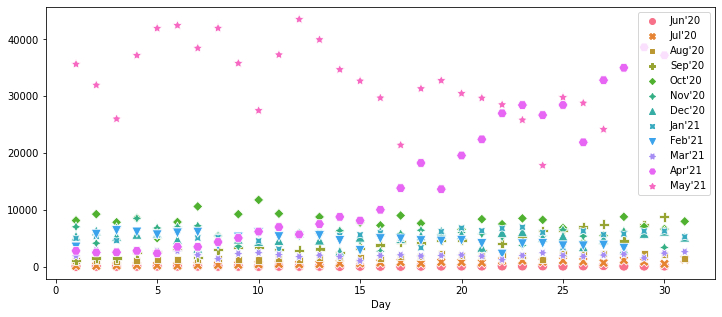

In [25]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=year_data, s=100)
plt.show()

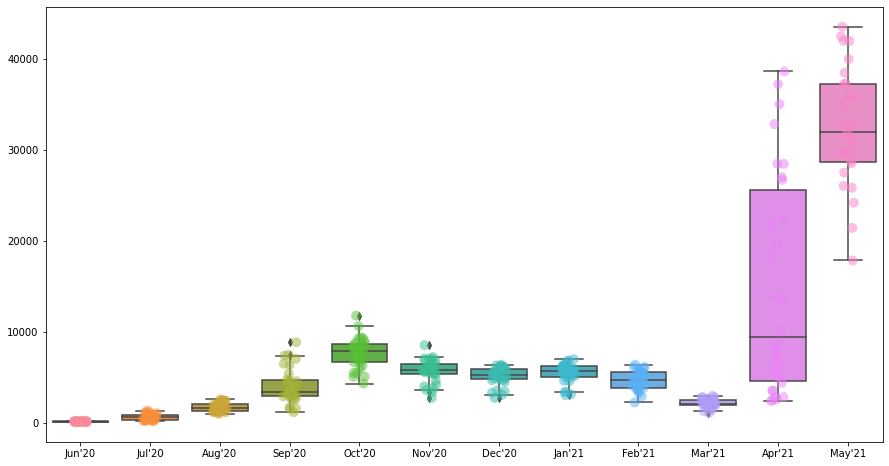

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(data=year_data)
sns.stripplot(data=year_data, s=10, alpha=0.5)
plt.show()

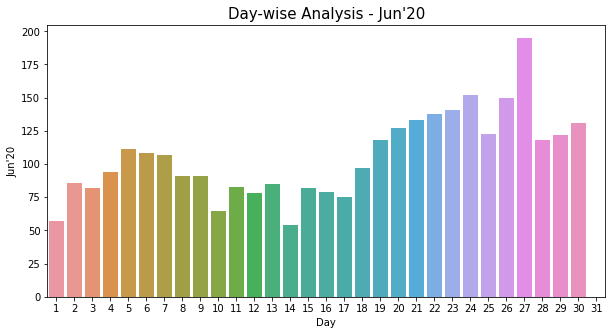

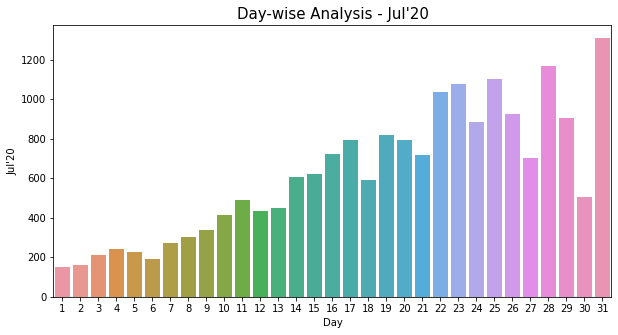

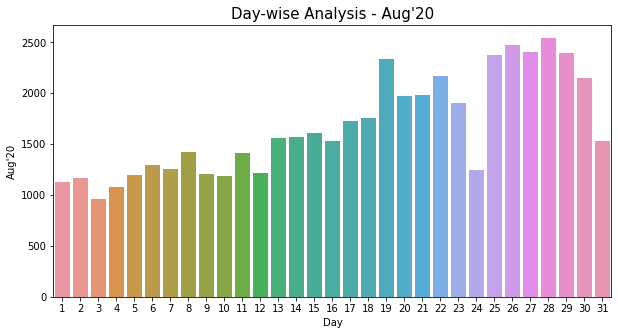

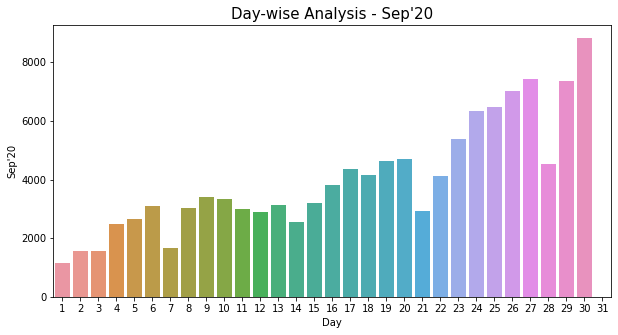

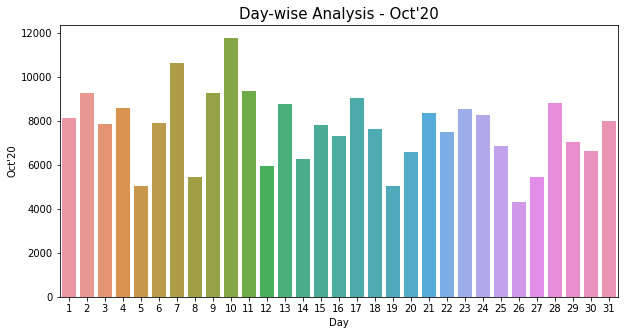

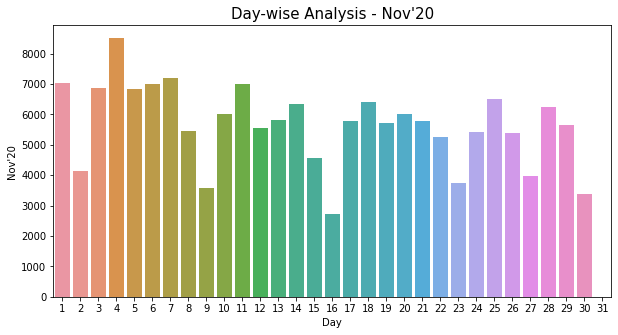

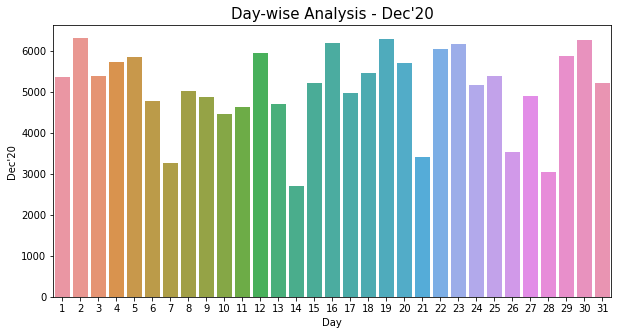

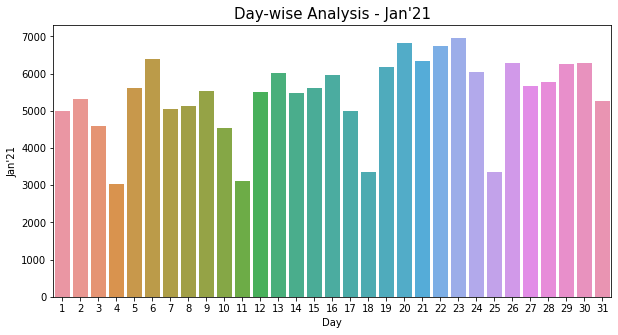

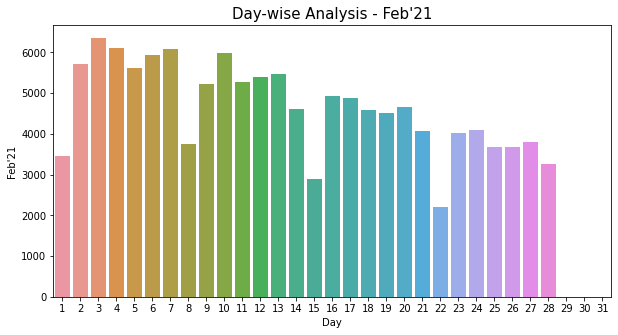

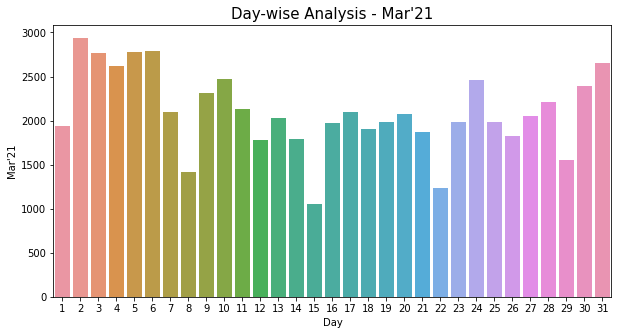

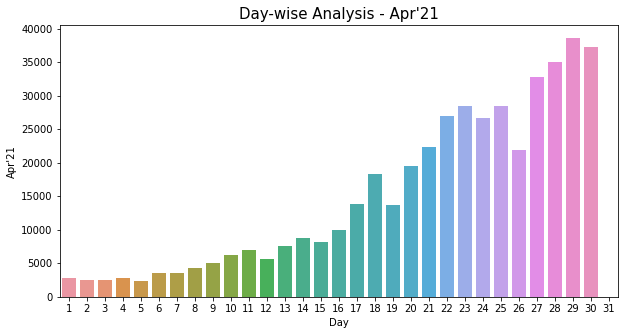

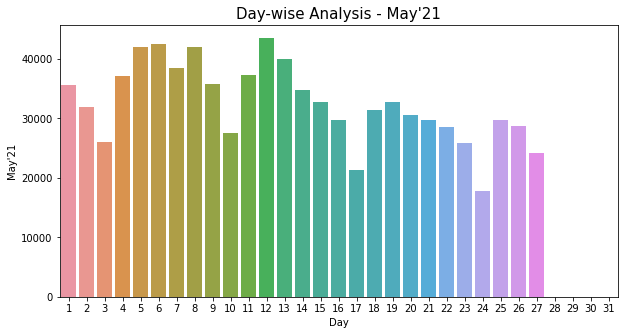

In [27]:
label = year_data.columns.tolist()
for i in range(0,12):
    plt.figure(figsize=(10,5))
    plt.title(f'Day-wise Analysis - {label[i]}', fontsize=15)
    plt.ylabel('Confirmed Cases')
    sns.barplot(year_data.index, year_data[label[i]])

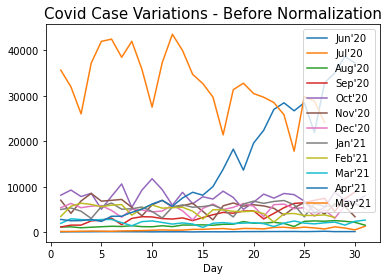

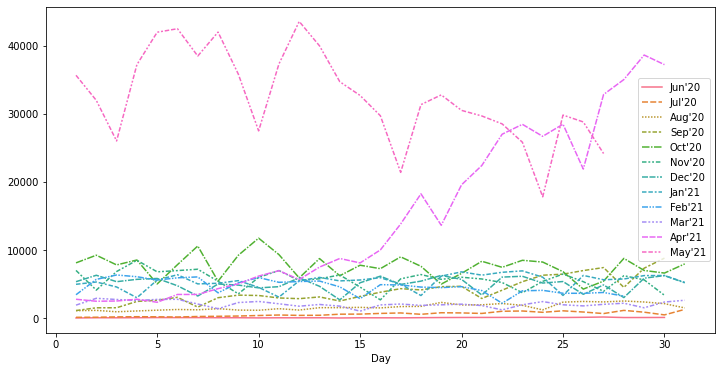

In [28]:
year_data.plot()
plt.title('Covid Case Variations - Before Normalization', fontsize=15)
plt.figure(figsize=(12,6))
sns.lineplot(data=year_data)
plt.show()

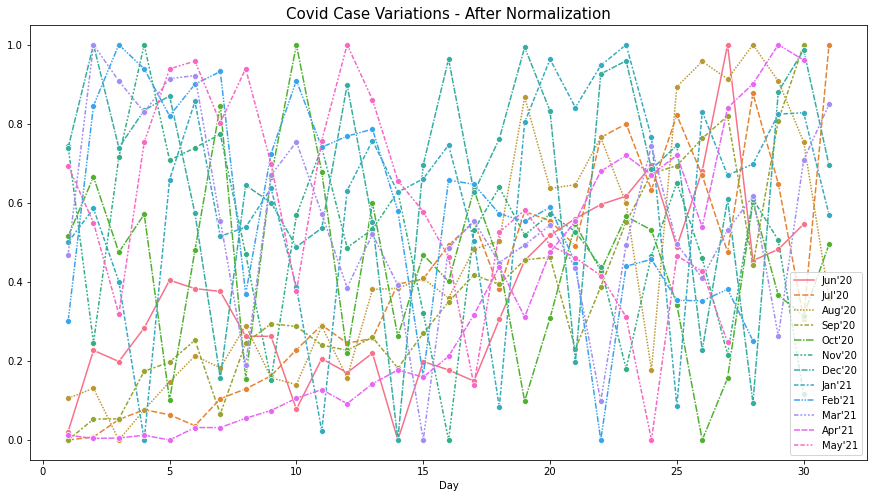

In [29]:
# Normalizing Data
norm_data = (year_data - year_data.min()) / (year_data.max() - year_data.min())

plt.figure(figsize=(15,8))
plt.title('Covid Case Variations - After Normalization', fontsize=15)
sns.lineplot(data=norm_data, marker='o')
plt.show()

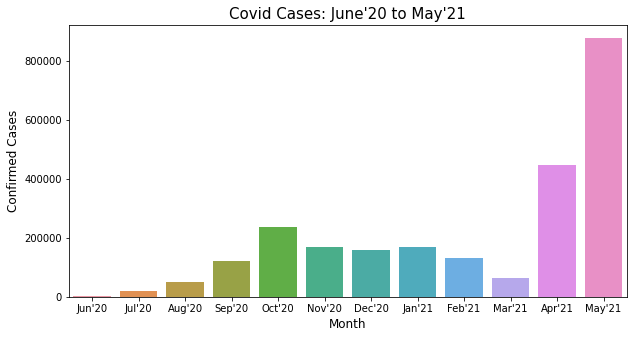

In [30]:
plt.figure(figsize=(10,5))
plt.title("Covid Cases: June'20 to May'21", fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)
sns.barplot(label, year_data.sum())
plt.show()

## Thank You!